# Introduction

We were tasked with finding the **best neighborhood in Pittsburgh** by whatever means necessary.

Initially, we started brainstorming some ideas for creative metrics to measure this.

![GIF](https://media.giphy.com/media/2H67VmB5UEBmU/giphy.gif)

Our initial ideas included best air quality, greatest number of restaurants, greatest number of parks, and best areas to shoot a scary movie.

![GIF](https://media.giphy.com/media/10aADbYxnJlc9q/giphy.gif)
![GIF](https://media.giphy.com/media/ySVKduoNNFoRy/giphy.gif)
![GIF](https://media.giphy.com/media/SbwGrFfajN4OI/giphy-downsized-large.gif)
![GIF](https://media.giphy.com/media/GsJO3Yy0DCvEk/giphy.gif)

Due to the databases available, these ideas were scrapped for our current metric.

# The Metric

The metric that we decided to use is the most dog friendly neighborhood in Pittsburgh since the best neighborhoods in Pittsburgh should also be the best for a man's best friend.

![GIF](https://media.giphy.com/media/f4HpCDvF84oh2/giphy.gif)

The features that we are measuring are occupied housing units, number of dog licenses, and availability of supermarkets. 

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

houses_pandas = pd.read_csv("PittsburghHouses.tsv" , sep='\t')
dl = pd.read_csv("DogLicenses.csv", index_col = "DogName")
stores_data = pd.read_csv("data-conveniencesupermarkets.csv")

**Housing Database:** The number of occupied units in 2010 of Pittsburgh neighborhoods.

In [3]:
houses_pandas.sample(5)

,Neighborhood,Sector #,Population (2010),Total # Units (2000),Total # Units (2010),% Occupied Units (2010),% Vacant Units (2010),# Occupied Units (2010),% Owner Occupied Units (2010),% Renter Occupied Units (2010),...,% Units Built before 1939,Median Home Value (2000),Med. Val. ('00 in '10 Dollars),Median Home Value (2010),% Change Real Value 2000-2010,Median Sale Price (2010),# Sales Counted (2010),Foreclosures (2008),Foreclosures (2010),% of all Housing Units Foreclosed (2010)
54,New Homestead,8,990,387,429,0.939394,0.060606,436,0.903670,0.096330,...,0.245413,90900.0,115106.722543,117400.0,0.019923,100000.0,11,3,3,0.006993
76,Squirrel Hill South,10,15110,7069,7514,0.945568,0.054432,7135,0.456202,0.543798,...,0.493483,134633.0,170485.845723,201400.0,0.181330,218250.0,176,12,2,0.000266
17,Central Lawrenceville,13,4482,2904,2670,0.858801,0.141199,2388,0.491625,0.508375,...,0.763509,41950.0,53121.309249,66850.0,0.258440,67500.0,107,11,11,0.004120
22,Crafton Heights,4,3814,1819,1836,0.885076,0.114924,1634,0.627907,0.372093,...,0.407254,64450.0,81613.072254,76650.0,-0.060812,40000.0,60,29,18,0.009804
1,Allegheny West,3,462,390,355,0.749296,0.250704,203,0.182266,0.817734,...,0.574468,159700.0,202228.202312,123600.0,-0.388809,309940.0,7,0,1,0.002817


**Dog Licensing Database:** The number of dog licenses in zipcodes of Pittsburgh cities.

In [4]:
dl.sample(5)

,LicenseType,Breed,Color,OwnerZip,ExpYear,ValidDate
DogName,,,,,,
SIENNA,Dog Lifetime Spayed Female,POODLE MIX,BROWN,15220,2099,2015-12-10T09:24:19
LADY,Dog Lifetime Female,GER SHEPHERD,BLACK/TAN,15044,2099,2021-02-02T15:59:56
TAZ,Dog Lifetime Neutered Male,AM PIT BULL TERRIER,BRINDLE,15108,2099,2015-12-22T15:26:57
MORTY,Dog Lifetime Neutered Male,GOLDENDOODLE,APRICOT,15229,2099,2019-05-20T10:25:23
BECKHAM,Dog Lifetime Neutered Male,POODLE MIX,WHITE/BLACK,15237,2099,2021-04-29T15:50:07


**Supermarkets Database:** The number of supermarkets and convenience stores in Allegenheny County.

In [5]:
stores_data.sample(5)

,Client ID,Name,Legal Name,Start Date,Street #,Street Name,State,Zip,Lat,Lon,Accuracy,Category
76,201603170005,Speedway #2917,Speedway LLC,3/10/2016,4363,Broadway Blvd,PA,15146.0,40.397285,-79.768965,8.0,Convenience Store
261,54565,Friend's Shell Food Shop,NaN,11/21/1995,5735,Baum Blvd,PA,15206.0,40.458897,-79.932637,9.0,Convenience Store
581,201102220003,Shop 'n Save,J & D Supermarkets LLC,2/22/2006,799,Castle Shannon Bo,PA,15234.0,40.367580,-80.017161,3.0,Supermarket
585,44108,Shop 'n Save / Glenshaw #212403,MJS Foods LLC,11/29/2006,917,Butler St,PA,15116.0,40.513310,-79.950785,5.0,Supermarket
650,39139,The Fresh Market,The Fresh Market Inc.,7/3/2013,1551,Washington Rd,PA,15228.0,40.355489,-80.050351,8.0,Supermarket


# The Best Neighborhood

These are our rankings individually for each of our datasets.

In [7]:
occupied_units = houses_pandas.groupby("Neighborhood").sum()['# Occupied Units (2010)']
ordered_units = occupied_units.sort_values(ascending=True)
filter_data_least = ordered_units.iloc[31:]
reordered_units = filter_data_least.sort_values(ascending=False)
filter_data_most = reordered_units.iloc[31:]
rank = filter_data_most / 1586
print(rank)

Neighborhood
Lincoln Place            1.000000
Central Northside        0.959647
Homewood North           0.955233
Westwood                 0.926860
Knoxville                0.916141
East Allegheny           0.854351
Troy Hill                0.841740
Lower Lawrenceville      0.815889
Duquesne Heights         0.811475
Terrace Village          0.810845
Crawford-Roberts         0.775536
East Hills               0.759773
Spring Hill-City View    0.750946
Upper Lawrenceville      0.745902
South Oakland            0.715006
Homewood South           0.685372
Friendship               0.638083
Elliott                  0.622320
Middle Hill              0.609710
Allentown                0.600883
Upper Hill               0.582598
Point Breeze North       0.573140
Beltzhoover              0.535309
Manchester               0.517654
Arlington                0.475410
Polish Hill              0.450820
Bedford Dwellings        0.438209
Fineview                 0.423707
Name: # Occupied Units (2010), dtyp

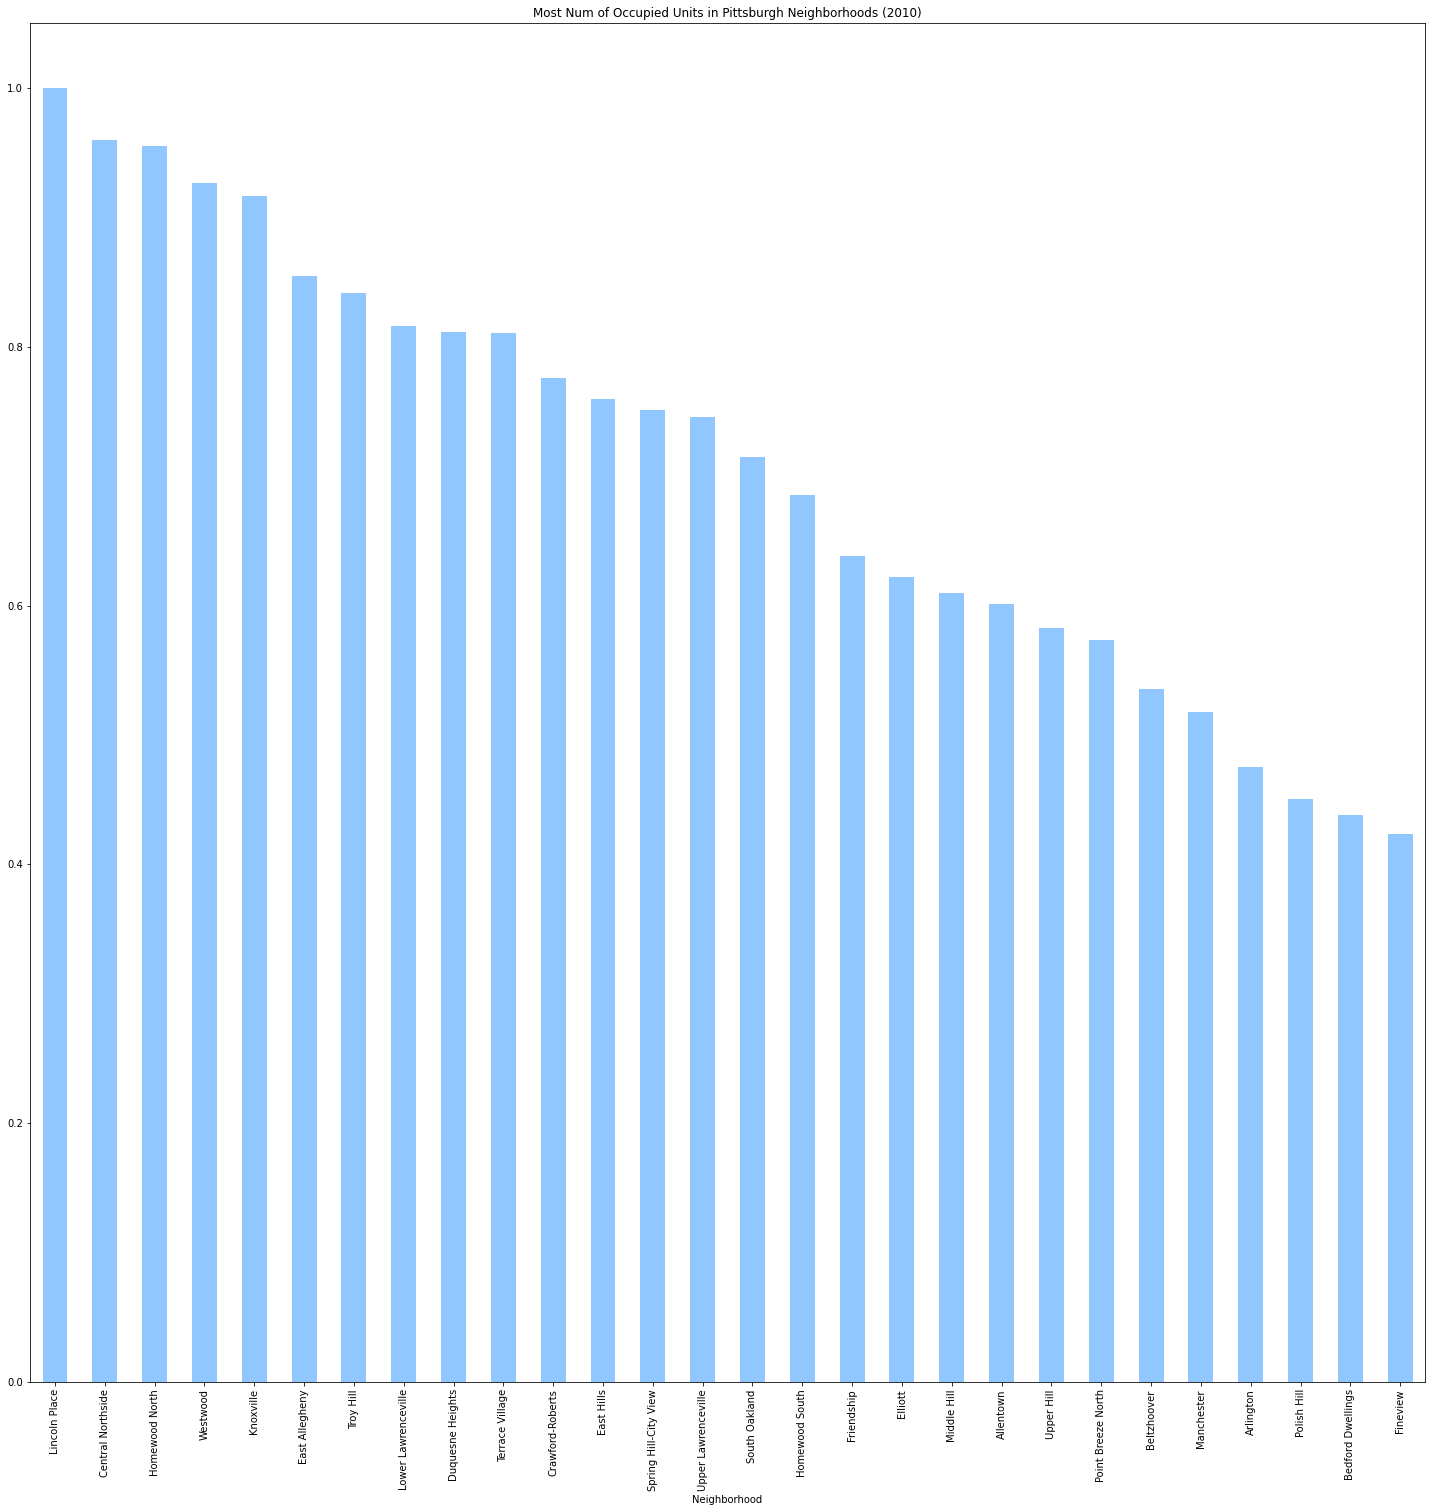

In [8]:
plt.style.use('seaborn-pastel')
rank.plot(kind='bar', x='Neighborhood', 
                    y='# Occupied Units (2010)', 
                    title='Most Num of Occupied Units in Pittsburgh Neighborhoods (2010)',
                    figsize=(25,25))

In [11]:
city_zips = [15201, 15203, 15204, 15205, 15206, 15207, 15208, 15210, 15211,
            15212, 15213, 15214, 15215, 15216, 15217, 15218, 15219, 15220,
            15221, 15222, 15224, 15226, 15227, 15230, 15232, 15233, 15234,
            15235, 15240, 15260, 15282]
def filter_zips(grouped):
    for i in city_zips:
        if grouped.iloc[0,3] == i:
            return True
    return False
    
pitt_zips = dl.groupby("OwnerZip").filter(filter_zips)
rankings = pitt_zips['OwnerZip'].value_counts() / 1233
rankings

15235    1.000000
15227    0.908354
15221    0.405515
15205    0.351987
15234    0.330089
15216    0.273317
15215    0.263585
15218    0.223844
15220    0.190592
15214    0.126521
15212    0.064071
15210    0.056772
15226    0.031630
15207    0.009732
15219    0.009732
15217    0.007299
15208    0.005677
15206    0.004866
15201    0.004055
15233    0.004055
15232    0.004055
15203    0.003244
15222    0.002433
15224    0.001622
15213    0.001622
15211    0.001622
15204    0.000811
15230    0.000811
Name: OwnerZip, dtype: float64

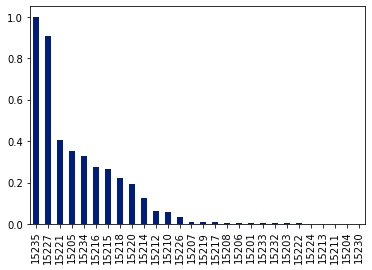

In [12]:
plt.style.use('seaborn-dark-palette')
rankings.plot.bar()

In [19]:
query_mask = stores_data['Category'] == "Supermarket"
supermarkets_only = stores_data[query_mask]
pitt_zip = [15201.0, 15203.0, 15204.0, 15205.0, 15206.0, 15207.0, 15208.0, 15210.0, 15211.0, 15212.0, 15213.0, 15214.0, 15215.0, 15216.0, 
            15217.0, 15218.0, 15219.0, 15220.0, 15221.0, 15222.0, 15224.0, 15226.0, 15227.0, 15230.0, 15232.0, 15233.0, 15234.0, 15235.0]
def filter_out_zips(grouped):
    for x in pitt_zip:
        if grouped.iloc[0, 7] == x:
            return True
    return False

only_pitt_zip = supermarkets_only.groupby("Zip").filter(filter_out_zips)
rankings2 = only_pitt_zip["Zip"].value_counts()/6
print(rankings2)

15205.0    1.000000
15235.0    0.833333
15227.0    0.833333
15210.0    0.666667
15217.0    0.666667
15222.0    0.666667
15206.0    0.666667
15212.0    0.500000
15221.0    0.500000
15224.0    0.500000
15213.0    0.500000
15220.0    0.333333
15226.0    0.333333
15203.0    0.333333
15216.0    0.333333
15219.0    0.166667
15211.0    0.166667
15234.0    0.166667
15201.0    0.166667
15218.0    0.166667
15232.0    0.166667
15208.0    0.166667
Name: Zip, dtype: float64


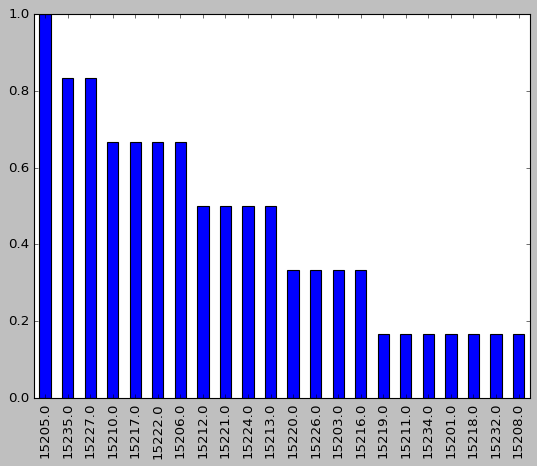

In [23]:
plt.style.use('classic')
rankings2.plot.bar()

We added all the rankings for our neighborhoods. We found these to be our top 5.
1. Westwood(15205) 0.351987 + 1 + 0.92686 = 2.278847
2. Knoxville(15210) 0.916141 + 0.056772 + 0.666667 = 1.63958
3. Central Northside(15212) 0.959647 + 0.064071 + 0.500000 - 1.523718
4. Beltzhoover(15210) 0.535309 + 0.056772 + 0.666667 = 1.258748
5. Arlington(15210) 0.475410 + 0.056772 + 0.666667 = 1.198849

We ended up with these as our best neighborhoods by adding up our individual rankings together.
The *Best neighborhood* ended up being **Westwood**.

![GIF](https://media.giphy.com/media/s2qXK8wAvkHTO/giphy.gif)

# Conclusion

**Nhu:** "As shown, my personal favorite neighborhood is **LINCOLN PLACE**. This is in according to the most number of occupied units in 2010 derived to find which is the most dog friendly neighborhood. 

My favorite neighborhood differs from the group's which is **WESTWOOD**. My data places Westwood as fourth, which is still high on my list, but not enough to disagree with the group's favorite as a whole."

**Alex:** "According to my data, the favorite zipcode of my data is **15235** which includes the Borough of Churchill, Penn Hills and Wilkins Townships, and a part of the city.  This has a significant amount of dog licenses and therefore is considered the most dog friendly in the sense of the ability to license dogs.

The best neighborhood in Pittsburgh based on group data is **Westwood**.  The zip code for Westwood is **15205**, which makes it my fourth highest ranked.  This ranks fairly high on my list but still disagrees with the personal favorite according to my dataset."

**Daniel:** "From my data, the best zip code is **15205** which contains the neighborhoods Fairywood, Crafton Heights, Westwood, Oakwood. This is based off of **15205** having the most supermarkets which is 6. With the combined metrics of the group we found **Westwood** to be the best neighborhood. The zipcode **15205** contains our group's best neighborhood of **Westwood** which is also number one in my personal ranking."

![alt taxt](SmartSelect_20211122-132013_Samsung_Internet.jpg "Muffin")